# Correlation studies - pairwise correlation plots 
Extended Figure 2F-I

- Author: CW
- Files needed: clinical_var_analysis/cohort_relative_subtype_proportions.csv, Supplementary_Table_1.csv
- last updated: 04/10/24



In [1]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
#read in subtype proportion files 
subtype_props = read.csv('/path_to_file/cohort_relative_subtype_proportions.csv',
                        check.names = FALSE)

In [3]:
rownames(subtype_props) <- subtype_props[,1]
subtype_props[,1] <- NULL

In [4]:
#take out 1122_1
subtype_props <- subtype_props[, -which(names(subtype_props) %in% c("1122_1"))]

In [5]:
subtype_props

,1098_5,1098_4,1098_3,1063_1,946_1,926_1,406_3,978_1,98_1,964_1,⋯,776_1,856_1,808_1,1098_1,1224_1,1224_2,406_2,1098_2,452_1,620_2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Plasma B/B,1.000000000,0.000000000,0.000000000,0.850000000,0.000000000,0.371893745,0.308528428,0.037037037,0.250000000,0.000000000,⋯,0.000000000,1.000000000,0.230769231,NA,NA,0.100000000,0.000000000,0.037037037,0.833333333,0.000000000
Plasma B/Immune,0.001199041,0.000000000,0.000000000,0.056105611,0.000000000,0.096337403,0.066714880,0.004366812,0.001248439,0.000000000,⋯,0.000000000,0.028571429,0.006465517,0.000000000,0.000000000,0.000786164,0.000000000,0.002159827,0.001719986,0.000000000
Plasma B/Total,0.001073729,0.000000000,0.000000000,0.009269357,0.000000000,0.089300412,0.062163073,0.000261643,0.000345423,0.000000000,⋯,0.000000000,0.013478819,0.001448576,0.000000000,0.000000000,0.000349773,0.000000000,0.000712758,0.000565995,0.000000000
Macrophage M2/Monocyte/Macrophage,0.803827751,0.116022099,0.396610169,0.458064516,0.481250000,0.533018868,0.542699725,0.129411765,0.309963100,0.621468927,⋯,0.534246575,0.751724138,0.404761905,0.312925170,0.142857143,0.258196721,0.040650407,0.146964856,0.220827179,0.260485651
Macrophage M2/Immune,0.067146283,0.021920668,0.079972659,0.234323432,0.348416290,0.025083241,0.035617429,0.048034934,0.104868914,0.195729537,⋯,0.008797654,0.148299320,0.036637931,0.035521236,0.011160714,0.024764151,0.036563071,0.099352052,0.102855177,0.020749077
Macrophage M2/Total,0.060128848,0.011918275,0.054672897,0.038713195,0.139240506,0.023251029,0.033187332,0.002878074,0.029015544,0.077683616,⋯,0.008632138,0.069961489,0.008208595,0.015883978,0.005720824,0.011017838,0.026755853,0.032786885,0.033846502,0.019549370
Endothelial/Endothelial,1.000000000,1.000000000,1.000000000,1.000000000,1.000000000,1.000000000,1.000000000,1.000000000,1.000000000,1.000000000,⋯,1.000000000,1.000000000,1.000000000,1.000000000,1.000000000,1.000000000,1.000000000,1.000000000,1.000000000,1.000000000
Endothelial/Stromal,0.818493151,0.077803204,0.640091116,0.500000000,0.466666667,0.675105485,0.513043478,0.230000000,0.422343324,0.763513514,⋯,0.905882353,0.846913580,0.563953488,0.547445255,0.082159624,0.072463768,0.089005236,0.322580645,0.055555556,0.155555556
Endothelial/Total,0.085540444,0.019296254,0.131308411,0.000545256,0.113924051,0.032921811,0.009939353,0.006017792,0.053540587,0.079802260,⋯,0.017042939,0.110077022,0.046837277,0.051795580,0.040045767,0.040223854,0.011371237,0.007127584,0.000226398,0.001159708


## Pairwise correlations plots: Extended Figure 2F

Pairwise correlations shown in Extended Figure 2F

1) mDC/cDC vs. CD8 HNRNPH1+ Teff/CD8 T

2) Tumor - Interferon/MHC-II (I)/Tumor vs. Macrophage M1/Monocyte/Macrophage

3) cDC2/cDC vs. CD8 Texme/CD8 T

4) Monocyte classical/Monocyte/Macrophage vs. CD8 GZMK+ Teff/CD8 T.

In [5]:
library(dplyr)

In [6]:
pairs = list(c('mDC/cDC', 'CD8 HNRNPH1+ Teff/CD8 T'), c('Tumor - Interferon/MHC-II (I)/Tumor','Macrophage M1/Monocyte/Macrophage'),
             c('cDC2/cDC', 'CD8 Texme/CD8 T'), c('Monocyte classical/Monocyte/Macrophage', 'CD8 GZMK+ Teff/CD8 T'))

### Function to plot correlations

In [12]:
plot_correlations <- function(compare_props_w_clinical, pair) {
    
    print(pair)
    prop1 <- pair[1]
    prop2 <- pair[2]

    #exclude 0 values

    correlation <- cor.test(compare_props_w_clinical[,pair[1]], compare_props_w_clinical[,pair[2]])

    #get correlation coefficient and p value
    cor_coef <- correlation$estimate
    cor_pval <- correlation$p.value
    #plot correlation


    options(repr.plot.width= 8, repr.plot.height = 6)
    p1 <- ggplot(compare_props_w_clinical, aes_string(x=as.symbol(prop1), y=as.symbol(prop2))) + 
                geom_point(aes(color=treatment_group, shape=subtype), size = 4) + 
    
                ## add treatment group colors and same shapes across all figures 
                scale_color_manual(values = c( ICI_combo = "#00B050",  ICI_PD1 = "#3C76AF", other_plus_ICI = '#B2E08A',
                        targeted_plus_ICI = "#A6CEE4", other = "#FB9B9A",
                         targeted = "#FEBF6F")) +
                scale_shape_manual(values= c(acral = 3, cutaneous = 16, mucosal = 17, uveal = 15)) + 
    
                geom_smooth(method=lm, color='black', size= 0.5) +
                #xlim(0,0.7) + ylim(0,0.7) +
                labs(title = paste0("Correlation between ",prop1, ' and ', prop2), 
                  y= prop2, x = prop1) + 
                 annotate("text", x=0.1, y=0.2,label= paste("r=",round(cor_coef, 3), "\n", 
                     "p=",round(cor_pval, 3))) +  
                 theme(panel.background = element_blank(), panel.border = element_blank(),
                  panel.grid.major = element_blank(),
                panel.grid.minor = element_blank(),
                axis.line = element_line(colour = "black"), 
                legend.position = "right", aspect.ratio=1) 
    print(p1)
    
    prop1 <- gsub(' ', '_', prop1)
    prop1 <- gsub('/', '_', prop1)
    prop1 <- gsub('-', '_', prop1)
    prop1 <- gsub('[()]', '_', prop1)
    
    prop2 <- gsub(' ', '_', prop2)
    prop2 <- gsub('/', '_', prop2)
    prop2 <- gsub('-', '_', prop2)
    prop2 <- gsub('[()]', '_', prop2)
    
    #ggsave(paste0('/home/cbw3/data/figure_generation/Figure2/ExtF2F', prop1, prop2, '.pdf'))
# Change the point size, and shape
#ggplot(mtcars, aes(x=wt, y=mpg)) +
#  geom_point(size=2, shape=23)

}    

### add metadata to columns

In [7]:
clinical_data = read.csv('/path_to_file/Supplementary_Table_1.csv')
#subset, include treatment group, subtype 
include_clinical = clinical_data[,c('patient_sample', 'treatment_group', 'subtype', 'tissue')]
rownames(include_clinical) <- include_clinical$patient_sample
include_clinical$patient_sample <- NULL 

[1] "mDC/cDC"                 "CD8 HNRNPH1+ Teff/CD8 T"


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 4 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_point()`).”


[1] "Tumor - Interferon/MHC-II (I)/Tumor" "Macrophage M1/Monocyte/Macrophage"  


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 5 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 5 rows containing missing values or values outside the scale range
(`geom_point()`).”


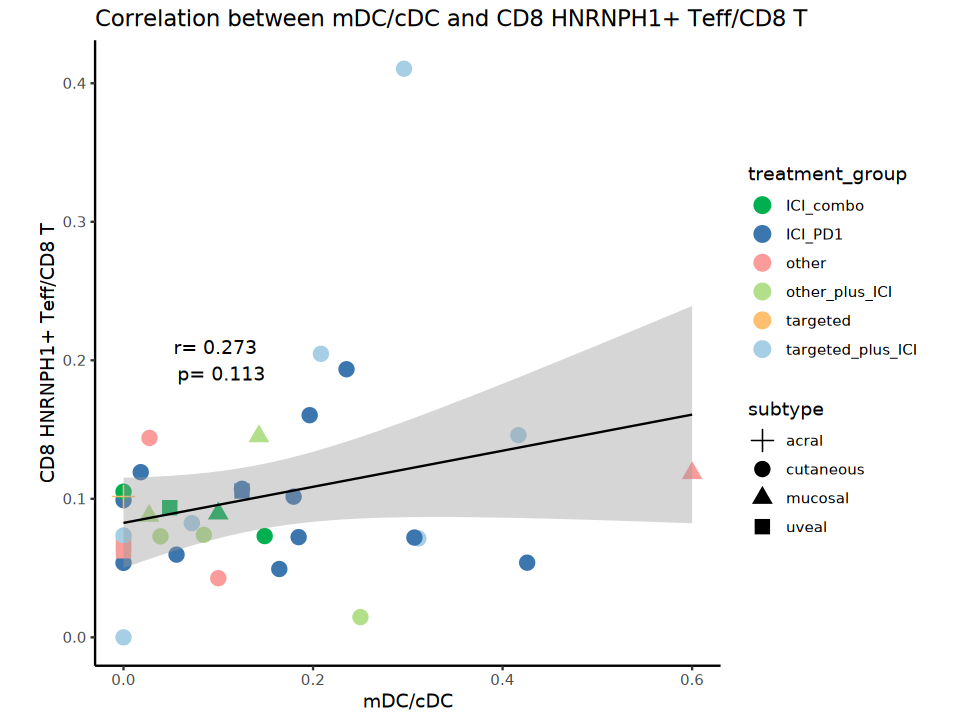

[1] "cDC2/cDC"        "CD8 Texme/CD8 T"


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 4 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_point()`).”


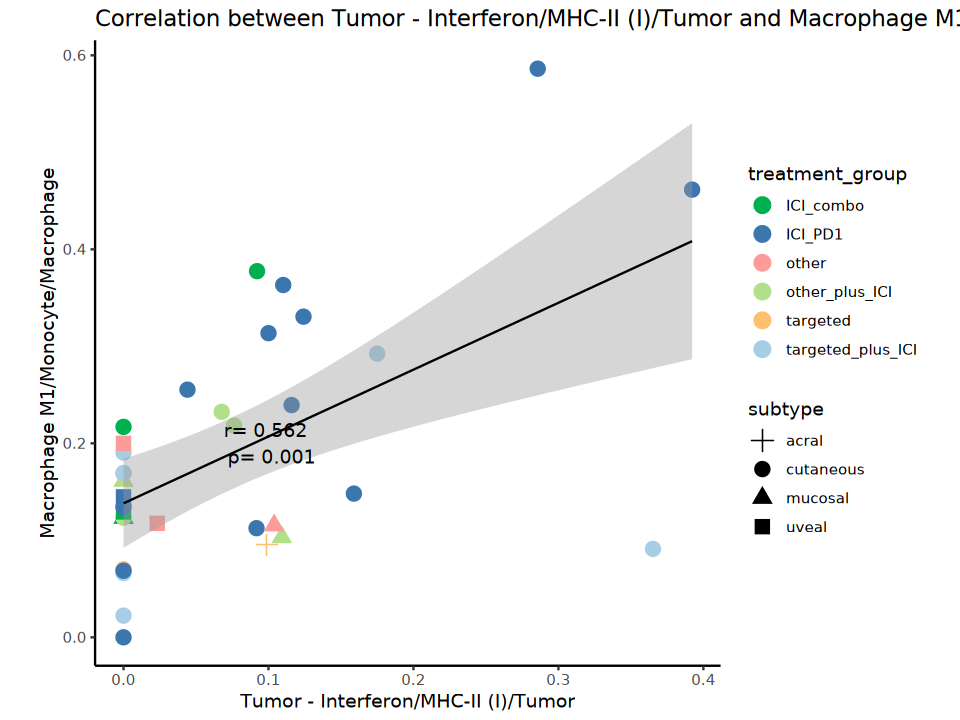

[1] "Monocyte classical/Monocyte/Macrophage"
[2] "CD8 GZMK+ Teff/CD8 T"                  


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 4 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_point()`).”


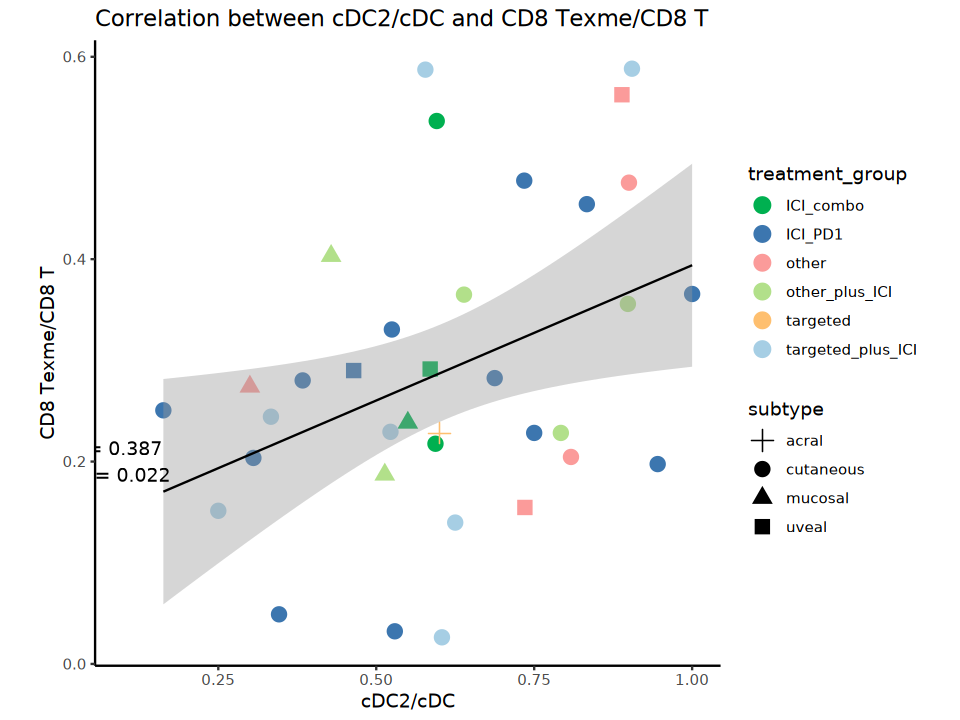

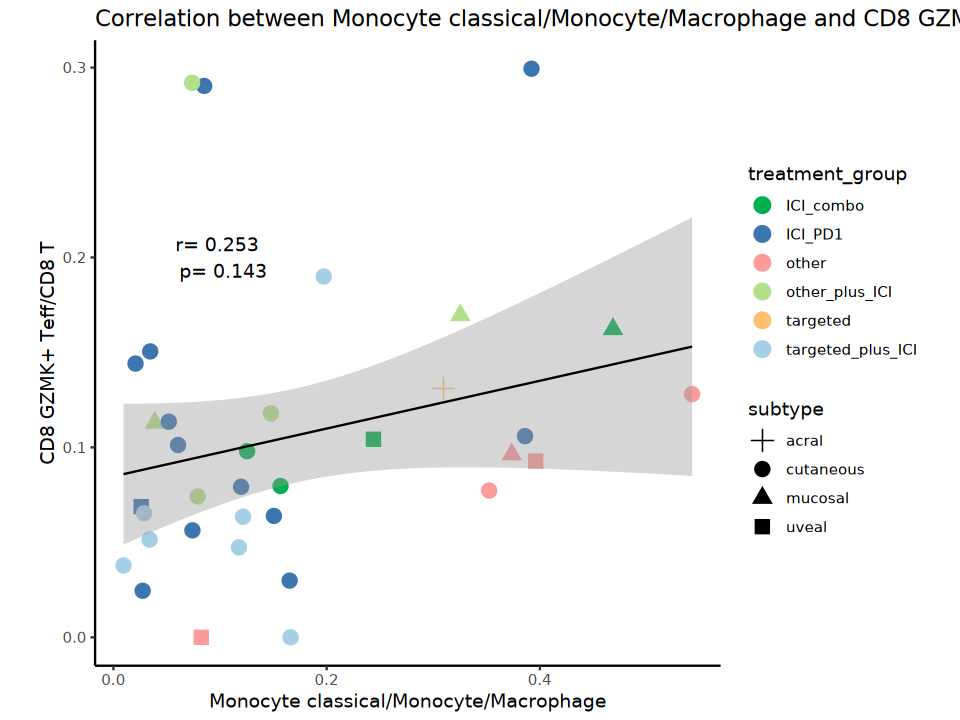

In [13]:
for(p in pairs) {
    compare_props = subtype_props[rownames(subtype_props) %in% p,]
    compare_props_w_clinical = merge(as.data.frame(t(compare_props)), include_clinical, by = 'row.names', all = TRUE)
    plot_correlations(compare_props_w_clinical, p)
}